In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# import matplotlib
# #matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     #"pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

colores = []
for name, color in mcolors.TABLEAU_COLORS.items():
    colores.append(name[4:])

In [2]:
### Data
file_data = './data/COL_covid_death_data.csv'
df_data = pd.read_csv(file_data)

### Data
file_data = './data/BOG_UCI_timeseries.csv'
df_data_ICU = pd.read_csv(file_data)

### Data
file_data = './data/Age_BOG_covid_cases_data.csv'
df_data_cases = pd.read_csv(file_data)

### Data load

In [3]:
folder_name = 'FRED_11001_postcalibration_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_out'

### Simulations
file = './output/SHORT_FORECAST/'+folder_name+'/fred_output.csv'
df = pd.read_csv(file)

### FRED params
file_data = './output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_out.csv'
df_params = pd.read_csv(file_data)

# ### Data
# file_data = './output/CALIBRATION/'+folder_name+'/COL_covid_death_data.csv'
# df_data = pd.read_csv(file_data)

### Individual projection

In [4]:
df_params['influenza_susceptibility_by_age_rate']

0    3.437784
1    3.437784
2    3.437784
3    3.437784
Name: influenza_susceptibility_by_age_rate, dtype: float64

In [5]:
df['job_id'].unique()

array(['FRED_11001_postcalibration_asymp_1',
       'FRED_11001_postcalibration_asymp_3',
       'FRED_11001_postcalibration_asymp_4',
       'FRED_11001_postcalibration_asymp_5'], dtype=object)

### Deaths

FRED_11001_postcalibration_asymp_1
FRED_11001_postcalibration_asymp_3
FRED_11001_postcalibration_asymp_4
FRED_11001_postcalibration_asymp_5


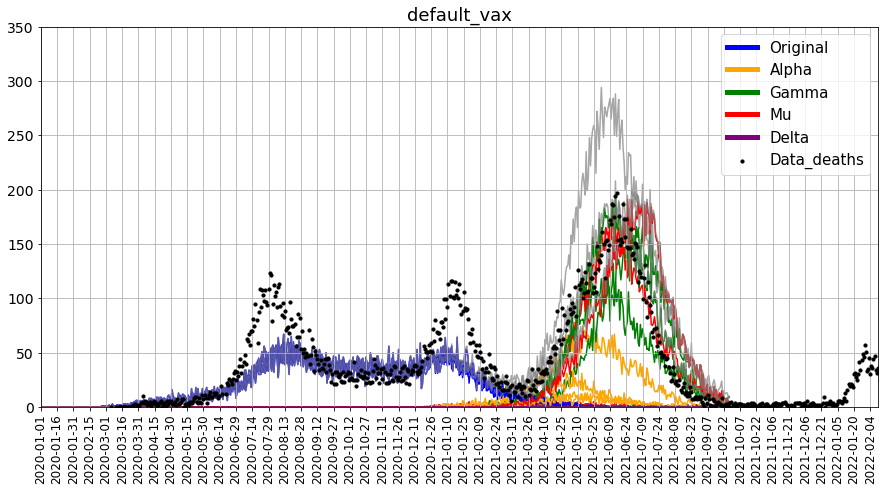

In [6]:
import warnings
#warnings.filterwarnings('ignore')
star_day = dt.datetime(2020,1,1)
death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)

#############################################################
death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date']))
##########################################################

# scenario = 'verylatedelta-vax_1-mov_basehighcontactsnopriority'
# mask = df_params['intervention_id'] == scenario
# df_scenario = df_params[mask]
df_scenario = df_params

title = 'default_vax'
mask_id = df_params['intervention_id'] == title
for simul_id in df_params[mask_id]['job_id'].unique():
    print(simul_id)
    mask = df['job_id'] == simul_id
    max_df = df[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    
    #deaths = pd.np.zeros(len(max_df['CFLoc_1_A0_5'].to_numpy()))
    deaths_original = max_df['CF_mean'].to_numpy()
    deaths_alpha = max_df['CF_1_mean'].to_numpy()
    deaths_gamma = max_df['CF_2_mean'].to_numpy()
    deaths_mu = max_df['CF_3_mean'].to_numpy()
    deaths_delta = max_df['CF_4_mean'].to_numpy()
    #deaths_omicron = max_df['CF_5_mean'].to_numpy()
    
    total_deaths = deaths_original + deaths_alpha + deaths_gamma + deaths_mu + deaths_delta
    
    ### Simulation
    ax.plot(date_days, deaths_original, zorder = 1, color = colores[0])
    ax.plot(date_days, deaths_alpha, zorder = 1, color = colores[1])
    ax.plot(date_days, deaths_gamma, zorder = 1, color = colores[2])
    ax.plot(date_days, deaths_mu, zorder = 1, color = colores[3])
    ax.plot(date_days, deaths_delta, zorder = 1, color = colores[4])
    ax.plot(date_days, total_deaths, zorder = 1, color = 'gray', alpha = 0.7)
    
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Original', color = colores[0], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Alpha', color = colores[1], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Gamma', color = colores[2], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Mu', color = colores[3], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Delta', color = colores[4], linewidth = 5)

ax.set_title(title)
### Data
ax.scatter(death_days, death_data, s = 10, c = 'black', label = 'Data_deaths', zorder = 2)

plt.xticks(pd.date_range(star_day, periods=100, freq='15d'), rotation=90, fontsize=12)
plt.yticks(fontsize=14)

ax.set_xlim(dt.datetime(2020,1,1),dt.datetime(2022,2,11))
ax.set_ylim(0,350)

plt.grid()
plt.legend()

In [37]:
folder_name = 'FRED_11001_calibration_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_test_out'

### Simulations
file = './output/CALIBRATION/'+folder_name+'/fred_output.csv'
df_cal_test = pd.read_csv(file)

file = './output/CALIBRATION/'+folder_name+'/FRED_parameters_out.csv'
df_cal_test_params = pd.read_csv(file)

In [38]:
folder_name = 'FRED_11001_calibration_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_out'

### Simulations
file = './output/CALIBRATION/'+folder_name+'/fred_output.csv'
df_cal = pd.read_csv(file)

file = './output/CALIBRATION/'+folder_name+'/FRED_parameters_out.csv'
df_cal_params = pd.read_csv(file)

In [32]:
jobs = ["FRED_11001_calibration_1122", "FRED_11001_calibration_82",
        "FRED_11001_calibration_1026", "FRED_11001_calibration_10",
        "FRED_11001_calibration_1265"]

FRED_11001_postcalibration_asymp_1
FRED_11001_postcalibration_asymp_3
FRED_11001_postcalibration_asymp_4
FRED_11001_postcalibration_asymp_5


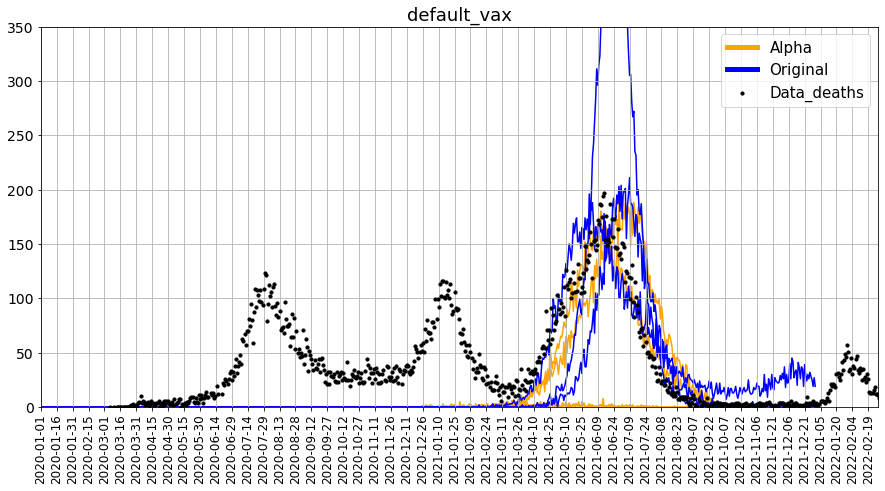

In [9]:
import warnings
#warnings.filterwarnings('ignore')
star_day = dt.datetime(2020,1,1)
death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)

variable = 'CF_3_mean'
#############################################################
death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date']))
##########################################################

title = 'default_vax'
mask_post_id = df_params['intervention_id'] == title
for simul_id in df_params[mask_id]['job_id'].unique():
    print(simul_id)
    mask = df['job_id'] == simul_id
    max_df = df[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    deaths_alpha = max_df[variable].to_numpy()
    #total_deaths = deaths_original + deaths_alpha + deaths_gamma + deaths_mu + deaths_delta
    
    ### Simulation
    ax.plot(date_days, deaths_alpha, zorder = 1, color = colores[1])
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Alpha', color = colores[1], linewidth = 5)

for simul_id in jobs:
    mask = df_cal['job_id'] == simul_id
    max_df = df_cal[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    
    deaths_original = max_df[variable].to_numpy()
    
    ### Simulation
    ax.plot(date_days, deaths_original, zorder = 1, color = colores[0])
    
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Original', color = colores[0], linewidth = 5)
ax.set_title(title)

### Data
ax.scatter(death_days, death_data, s = 10, c = 'black', label = 'Data_deaths', zorder = 2)

plt.xticks(pd.date_range(star_day, periods=100, freq='15d'), rotation=90, fontsize=12)
plt.yticks(fontsize=14)

ax.set_xlim(dt.datetime(2020,1,1),dt.datetime(2022,2,28))
ax.set_ylim(0,350)

plt.grid()
plt.legend()

In [23]:
df_aux = df_cal_params[df_cal_params['variantalpha_transmissibility_factor'].isin(df_params['variantalpha_transmissibility_factor'])]

In [24]:
df_aux['job_id']

9         FRED_11001_calibration_10
1052    FRED_11001_calibration_1064
1109    FRED_11001_calibration_1122
1251    FRED_11001_calibration_1265
Name: job_id, dtype: object

In [25]:
df_params['variantalpha_transmissibility_factor']

0    1.478613
1    1.381738
2    1.375586
3    1.248926
Name: variantalpha_transmissibility_factor, dtype: float64

In [26]:
df_aux['variantalpha_transmissibility_factor']

9       1.375586
1052    1.381738
1109    1.478613
1251    1.248926
Name: variantalpha_transmissibility_factor, dtype: float64

In [28]:
for var in df_params['variantalpha_transmissibility_factor']:
    mask_cal = df_aux['variantalpha_transmissibility_factor'] == var
    mask_pos = df_params['variantalpha_transmissibility_factor'] == var
    print(df_aux[mask_cal]['job_id'].to_numpy()[0], df_params[mask_pos]['job_id'].to_numpy()[0])

FRED_11001_calibration_1122 FRED_11001_postcalibration_asymp_1
FRED_11001_calibration_1064 FRED_11001_postcalibration_asymp_3
FRED_11001_calibration_10 FRED_11001_postcalibration_asymp_4
FRED_11001_calibration_1265 FRED_11001_postcalibration_asymp_5


FRED_11001_calibration_118
FRED_11001_calibration_118


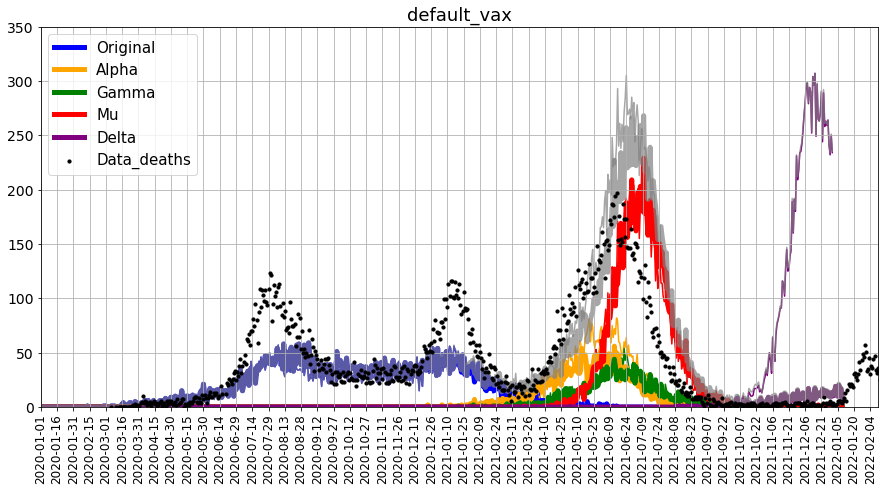

In [41]:
import warnings
#warnings.filterwarnings('ignore')
star_day = dt.datetime(2020,1,1)
death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)

#############################################################
death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date']))
##########################################################

# scenario = 'verylatedelta-vax_1-mov_basehighcontactsnopriority'
# mask = df_params['intervention_id'] == scenario
# df_scenario = df_params[mask]
df_scenario = df_params

for simul_id in df_cal_test['job_id'].unique()[:1]:
    mask = df_cal_test['job_id'] == simul_id
    print(simul_id)
    mask = df_cal_test['job_id'] == simul_id
    max_df = df_cal_test[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    
    #deaths = pd.np.zeros(len(max_df['CFLoc_1_A0_5'].to_numpy()))
    deaths_original = max_df['CF_mean'].to_numpy()
    deaths_alpha = max_df['CF_1_mean'].to_numpy()
    deaths_gamma = max_df['CF_2_mean'].to_numpy()
    deaths_mu = max_df['CF_3_mean'].to_numpy()
    deaths_delta = max_df['CF_4_mean'].to_numpy()
    #deaths_omicron = max_df['CF_5_mean'].to_numpy()
    
    total_deaths = deaths_original + deaths_alpha + deaths_gamma + deaths_mu + deaths_delta
    
    ### Simulation
    ax.plot(date_days, deaths_original, zorder = 1, color = colores[0])
    ax.plot(date_days, deaths_alpha, zorder = 1, color = colores[1])
    ax.plot(date_days, deaths_gamma, zorder = 1, color = colores[2])
    ax.plot(date_days, deaths_mu, zorder = 1, color = colores[3])
    ax.plot(date_days, deaths_delta, zorder = 1, color = colores[4])
    ax.plot(date_days, total_deaths, zorder = 1, color = 'gray', alpha = 0.7)
    
for simul_id in df_cal_test['job_id'].unique()[:1]:
    mask = df_cal['job_id'] == simul_id
    print(simul_id)
    mask = df_cal['job_id'] == simul_id
    max_df = df_cal[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    
    #deaths = pd.np.zeros(len(max_df['CFLoc_1_A0_5'].to_numpy()))
    deaths_original = max_df['CF_mean'].to_numpy()
    deaths_alpha = max_df['CF_1_mean'].to_numpy()
    deaths_gamma = max_df['CF_2_mean'].to_numpy()
    deaths_mu = max_df['CF_3_mean'].to_numpy()
    deaths_delta = max_df['CF_4_mean'].to_numpy()
    #deaths_omicron = max_df['CF_5_mean'].to_numpy()
    
    total_deaths = deaths_original + deaths_alpha + deaths_gamma + deaths_mu + deaths_delta
    
    ### Simulation
    ax.plot(date_days, deaths_original, zorder = 1, color = colores[0], linewidth = 5)
    ax.plot(date_days, deaths_alpha, zorder = 1, color = colores[1], linewidth = 5)
    ax.plot(date_days, deaths_gamma, zorder = 1, color = colores[2], linewidth = 5)
    ax.plot(date_days, deaths_mu, zorder = 1, color = colores[3], linewidth = 5)
    ax.plot(date_days, deaths_delta, zorder = 1, color = colores[4], linewidth = 5)
    ax.plot(date_days, total_deaths, zorder = 1, color = 'gray', alpha = 0.7, linewidth = 5)
    
    
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Original', color = colores[0], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Alpha', color = colores[1], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Gamma', color = colores[2], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Mu', color = colores[3], linewidth = 5)
ax.plot(pd.np.NaN, pd.np.NaN, zorder = 1, label = 'Delta', color = colores[4], linewidth = 5)

ax.set_title(title)
### Data
ax.scatter(death_days, death_data, s = 10, c = 'black', label = 'Data_deaths', zorder = 2)

plt.xticks(pd.date_range(star_day, periods=100, freq='15d'), rotation=90, fontsize=12)
plt.yticks(fontsize=14)

ax.set_xlim(dt.datetime(2020,1,1),dt.datetime(2022,2,11))
ax.set_ylim(0,350)

plt.grid()
plt.legend()

In [48]:
df_cal_params['variantdelta_imports_factor']

0       6.228760
1       1.478760
2       8.603760
3       3.853760
4       2.666260
          ...   
1979    0.789917
1980    4.352417
1981    9.102417
1982    1.977417
1983    6.727417
Name: variantdelta_imports_factor, Length: 1984, dtype: float64

In [47]:
df_cal_test_params['variantdelta_imports_factor']

0    5.25
1    5.25
2    5.25
Name: variantdelta_imports_factor, dtype: float64

In [46]:
df_cal_test_params.columns

Index(['influenza_transmissibility', 'influenza_asymp_infectivity',
       'shelter_in_place_compliance',
       'influenza_face_mask_transmission_efficacy',
       'enable_age_specific_susceptibility_min',
       'enable_age_specific_susceptibility',
       'influenza_susceptibility_by_age_minage',
       'influenza_susceptibility_by_age_minvalue', 'enable_face_mask_usage',
       'enable_face_mask_timeseries', 'facemask_compliance',
       'min_age_face_masks', 'enable_shelter_in_place_timeseries',
       'start_date', 'community_contact_rate_1',
       'enable_community_contact_timeseries',
       'nursing_home_incidence_importations_factor',
       'neighborhood_same_age_bias', 'influenza_susceptibility_by_age_rate',
       'influenza_susceptibility_by_age_offset',
       'influenza_susceptibility_by_age_cutoff',
       'influenza_susceptibility_by_age_high', 'variantalpha_transmissibility',
       'variantalpha_transmissibility_factor',
       'variantalpha_cross_protection_prob',